**Project Background**

I will be reviewing some public data found that relates to airline passenger satisfaction from a dataset found from the resource Kaggle. I will be using a logistic regression model to determine which factors are most likely to lead to satisfaction and then build the model to be able to predict if new data was fed into the model, predict if the customer would be satisfied or not. The overall research question for this data is, which service quality factors most significantly predict passenger satisfaction in airline services, and to what extent do they influence the likelihood of a passenger being satisfied.

**Dataset Description**

This dataset contains an airline passenger satisfaction survey. It contains data that is a high level view of non-identifable information of the customer and then some data that would contribute to understanding factors that may help understand what correlated to satisfaction.

**Data Dictionary**

Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient (0-5)

Ease of Online booking: Satisfaction level of online booking (0-5)

Gate location: Satisfaction level of Gate location (0-5)

Food and drink: Satisfaction level of Food and drink (0-5)

Online boarding: Satisfaction level of online boarding (0-5)

Seat comfort: Satisfaction level of Seat comfort (0-5)

Inflight entertainment: Satisfaction level of inflight entertainment (0-5)

On-board service: Satisfaction level of On-board service (0-5)

Leg room service: Satisfaction level of Leg room service (0-5)

Baggage handling: Satisfaction level of baggage handling (0-5)

Check-in service: Satisfaction level of Check-in service (0-5)

Inflight service: Satisfaction level of inflight service (0-5)

Cleanliness: Satisfaction level of Cleanliness (0-5)

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

**Importing the dataset**

The data is imported into Pandas to be manipulated, the data transformations are minor. Columns such as Arrival/Depature delay are normalised, using StandardScaler, the data was normalised to create better performance in the model, because the ‘Delay in minutes’ columns had a wider range, normalising the data in these columns allows the data the to train faster because the data is easier to work as the scale has been reduced to closer to 0. This improves the models performance as the data is on a similar scale.

Null values were replaced on Delay columns with the mean to prevent the need to remove data from the datasets. Because of the low percentage of missing values, imputation is a sensible approach to replacing these missing values with the mean of those fields.

The data is split into 2 data files for training and testing the data, totaling up to be 125,000+ rows of data.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
#Map the values for the dependent variables to Boolean values to be used later in the model
train_df['satisfaction'] = train_df['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})
test_df['satisfaction'] = test_df['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

#Search for number null values
train_df.isnull().sum()




Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [2]:
test_df.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [ ]:
#Replace null values using imputation for mean values of the relevant fields.
train_df['Arrival Delay in Minutes'].fillna(train_df['Arrival Delay in Minutes'].mean(), inplace=True)
train_df['Departure Delay in Minutes'].fillna(train_df['Departure Delay in Minutes'].mean(), inplace=True)
test_df['Arrival Delay in Minutes'].fillna(test_df['Arrival Delay in Minutes'].mean(), inplace=True)
test_df['Departure Delay in Minutes'].fillna(test_df['Departure Delay in Minutes'].mean(), inplace=True)

# Initialise the scaler
scaler = StandardScaler()

#Normalise the numerical features in the training data set
train_df[['Arrival Delay in Minutes', 'Departure Delay in Minutes']] = scaler.fit_transform(train_df[['Arrival Delay in Minutes', 'Departure Delay in Minutes']])
# Normalise the numerical features in the testing data set
test_df[['Arrival Delay in Minutes', 'Departure Delay in Minutes']] = scaler.transform(test_df[['Arrival Delay in Minutes', 'Departure Delay in Minutes']])

**Satisfaction Distribution**

A quick check to see how the data is distributed. The is evenly split means the data is suitable for the regression model and prevents any bias towards the majority class. It prevents poor generalisation for unseen data as well.

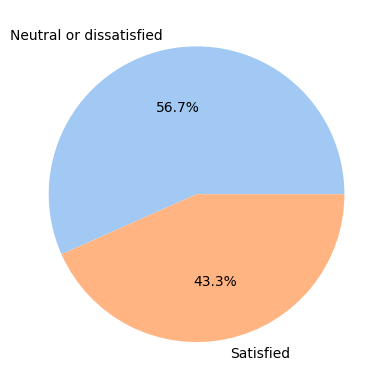

In [ ]:
#Training dataset target variable distribution
plt.pie(train_df.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("pastel"), autopct = '%1.1f%%')
pass

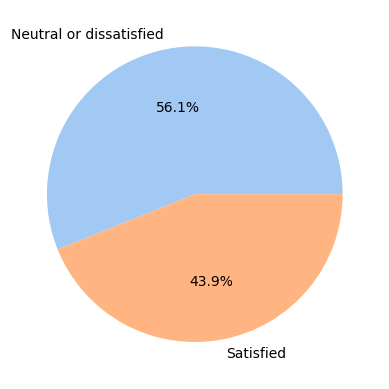

In [ ]:
#Testing dataset target variable distribution
plt.pie(test_df.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("pastel"), autopct = '%1.1f%%')
pass

**Exploratory Data Analysis**

Checking how the data is distributed amongst the different fields, looking at the distribution of where the % amongst the recorded features. factors such as seat comfort, leg room, inflight entertainment were more likely to be highly rated. >=50%


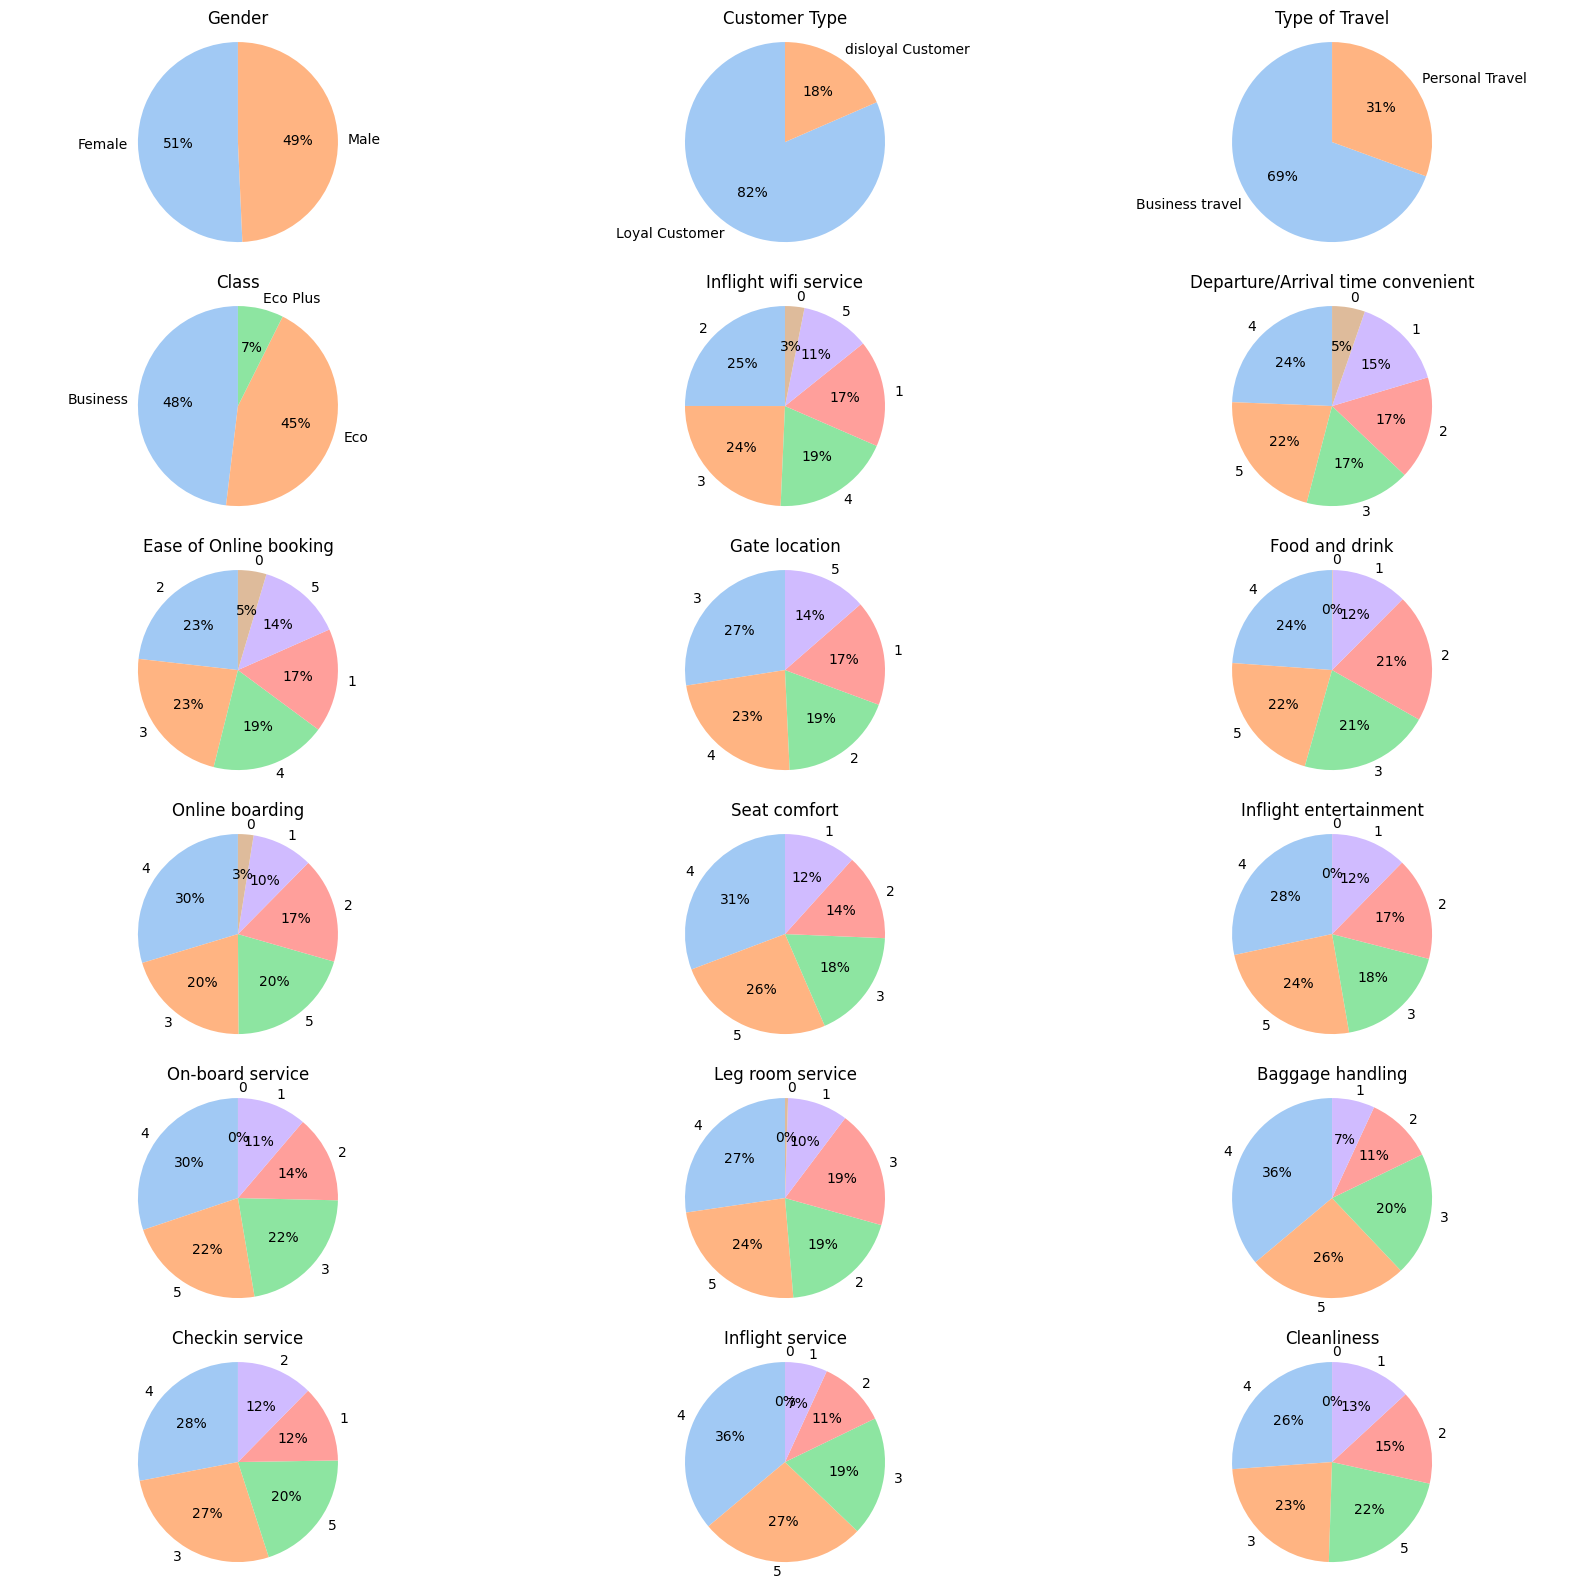

In [ ]:
#Building graphical representation to view indepdent variable distribution

data = test_df.drop(test_df.iloc[:,[0, 1]], axis = 1)
categorical_indexes = [0, 1, 3, 4] + list(range(6, 20))
data.iloc[:,categorical_indexes] = data.iloc[:,categorical_indexes].astype('category')
categ = data.iloc[:,categorical_indexes]
fig, axes = plt.subplots(6, 3, figsize = (20, 20))
for i, col in enumerate(categ):
    column_values = data[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//3, i%3].pie(sizes, labels = labels, colors = sns.color_palette("pastel"), autopct = '%1.0f%%', startangle = 90)
    axes[i//3, i%3].axis('equal')
    axes[i//3, i%3].set_title(col)
plt.show()

**Analysis**

Columns such as Gender, Customer Type, Type of Travel, Class and Satisfaction are encoded to the model to use these features. The satisfaction is the dependent variable in this model, the decision to use 1000 iterations for the logistic regression allows for convergence.

The models accuracy was measured at 77% and the Precision, Recall and F1 score were measured at 74%. With a measure of ROC AUC 84%, indicating the model has a good discrimination capability between the measured variable of satisfied and dissatisfied customers.

In [ ]:
# Drop unnecessary columns (unused)
#train_df.drop(columns=['Unnamed: 0', 'id'], inplace=True)
#test_df.drop(columns=['Unnamed: 0', 'id'], inplace=True)

# Label encoding for categorical variables
label_enc = LabelEncoder()

# Columns to encode
cols_to_encode = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

for col in cols_to_encode:
    train_df[col] = label_enc.fit_transform(train_df[col])
    test_df[col] = label_enc.transform(test_df[col])
# Define features and target
features = train_df.drop(columns=['satisfaction'])
target = train_df['satisfaction']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=42)


# Initialise and train logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions on validation set
y_pred = log_reg.predict(X_val)

# Evaluation metrics
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))



              precision    recall  f1-score   support

           0       0.80      0.80      0.80     11713
           1       0.74      0.74      0.74      9068

    accuracy                           0.77     20781
   macro avg       0.77      0.77      0.77     20781
weighted avg       0.77      0.77      0.77     20781

[[9344 2369]
 [2317 6751]]


The confusion matrix measurement showed actual figures of a balanced performance between the classes.

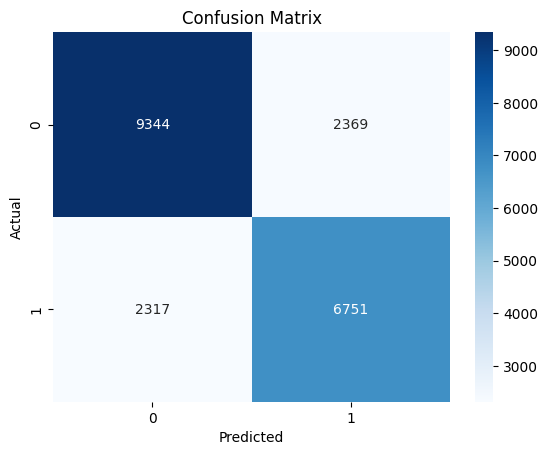

In [ ]:
# Visualisation
# Confusion Matrix
cm = confusion_matrix(y_val,y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



Using feature importance to see Coefficients measured here influence from some variables, suggesting that the odds of satisfaction increase with each unit increase in things like Online boarding, inflight entertainment etc. and conversely the odds of dissatisfaction increase with things like Departure/arrival time, as these increases the satisfaction will drop

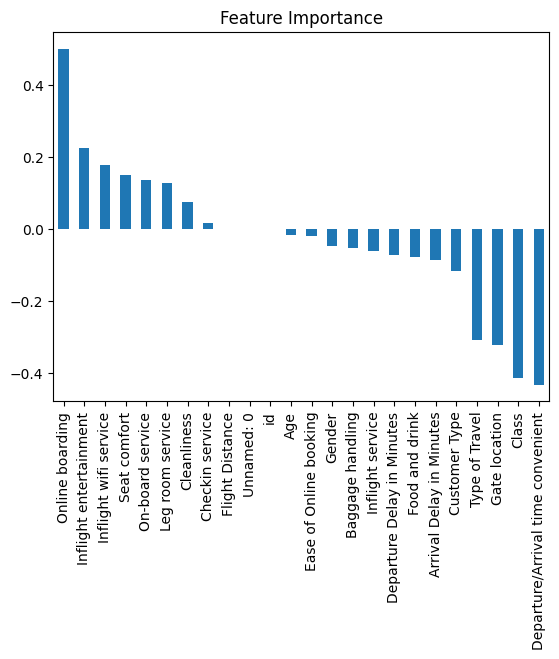

In [ ]:
# Feature importance
importance = pd.Series(log_reg.coef_[0], index=features.columns).sort_values(ascending=False)
importance.plot(kind='bar')
plt.title('Feature Importance')
plt.show()

The ROC Area under curve of this model is 84%, is a strong indicator that the model will perform much better against random chance.

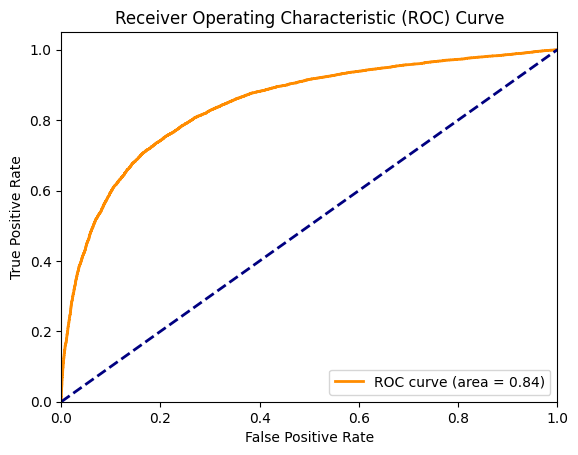

In [ ]:
# ROC Curve
y_val_prob = log_reg.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

A correalation matrix helps to further understand which data points are more strongly correalated to others in the list of features.

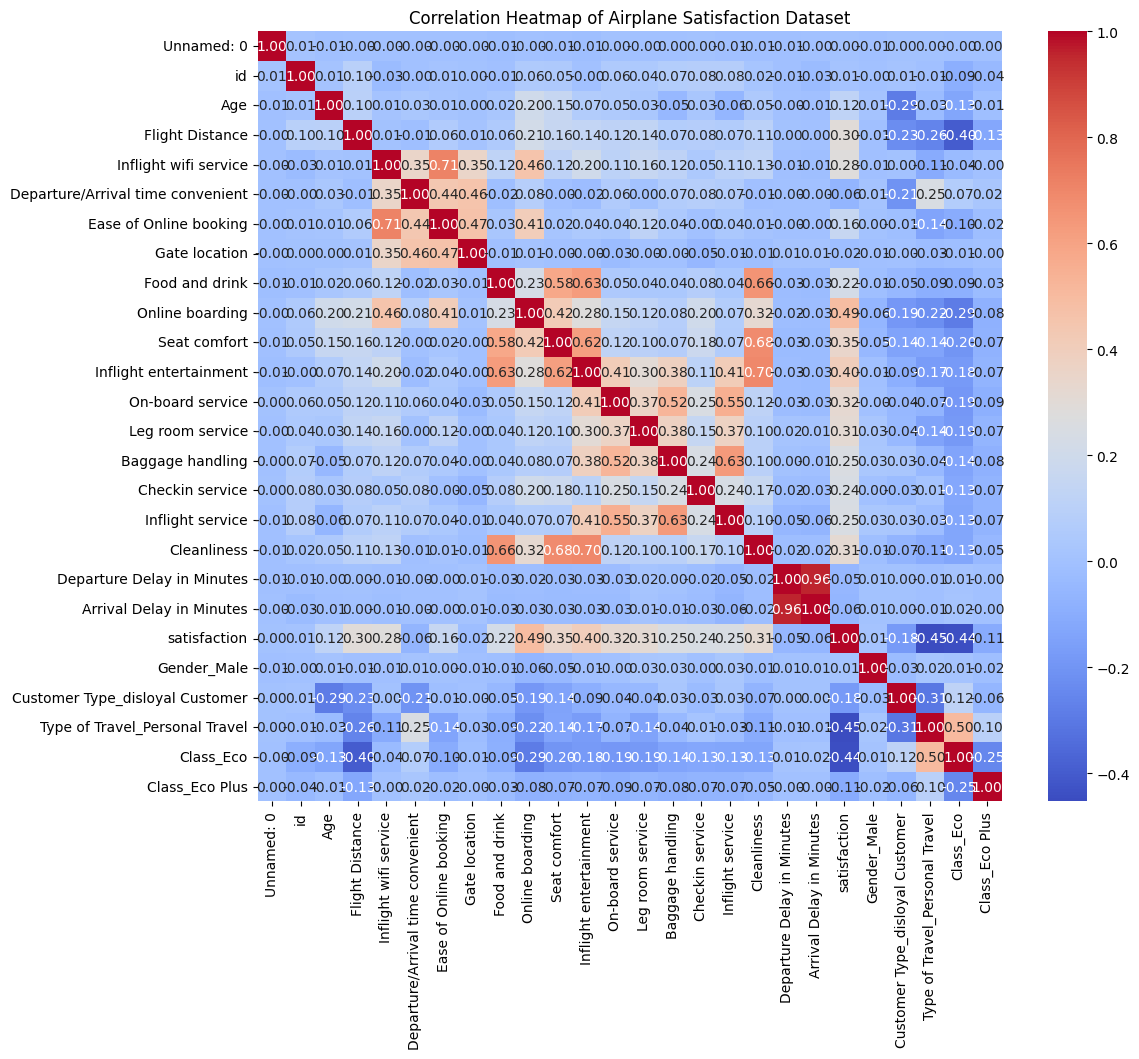

In [ ]:
# Compute the correlation matrix
corr_matrix = test_df.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap of Airplane Satisfaction Dataset')
plt.show()